In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings as wr # for Handle Error 
from sklearn.model_selection import train_test_split # for Data Separation
from sklearn.tree import DecisionTreeClassifier
from fasteda import fast_eda  # show data all info

DataFrame Head:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


DataFrame Tail:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


----------------------------------------------------------------------------------------------------
Missing values:


,0
Age,177
Cabin,687
Embarked,2


----------------------------------------------------------------------------------------------------
MSNO Matrix:



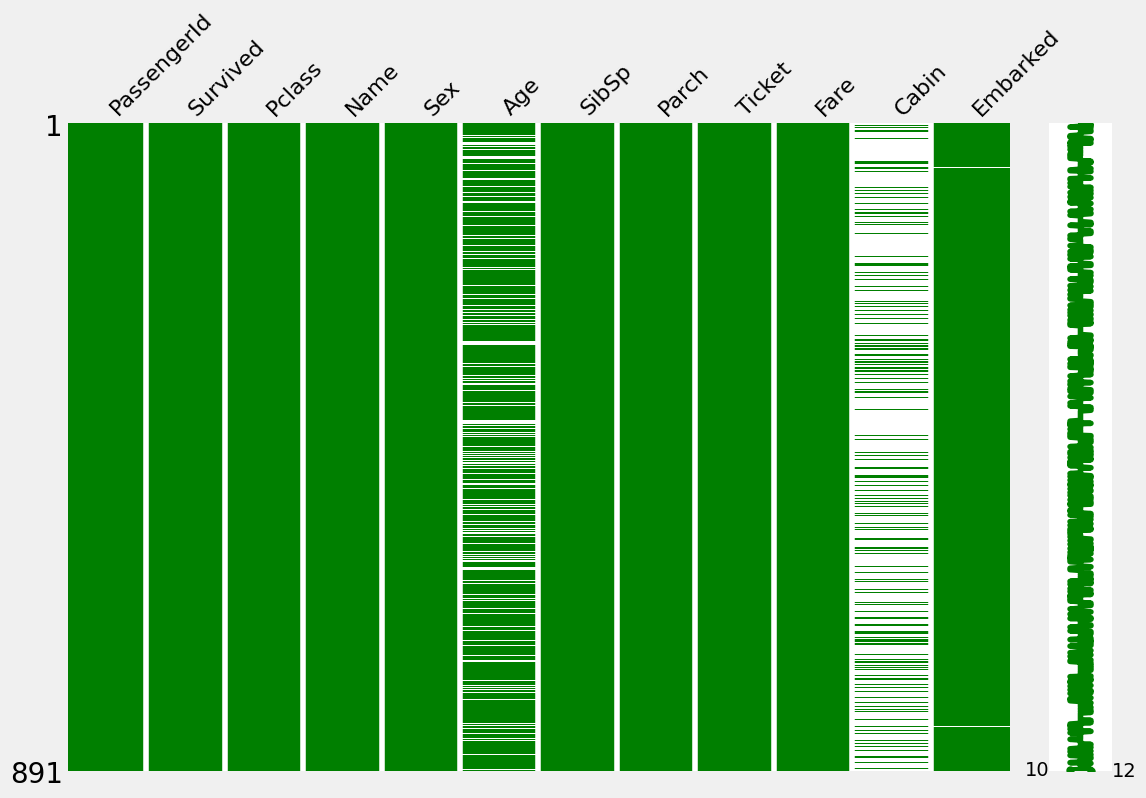

----------------------------------------------------------------------------------------------------
Shape of DataFrame:

(891, 12)

----------------------------------------------------------------------------------------------------
DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83

,count,mean,median,std,min,25%,50%,75%,max,skewness,kurtosis
PassengerId,891,446,446,257.354,1,223.5,446,668.5,891,-0.000608,-1.223945
Survived,891,0.384,0,0.487,0,0,0,1,1,0.382140,-1.853969
Pclass,891,2.309,3,0.836,1,2,3,3,3,-0.467558,-1.418028
Age,714,29.699,28,14.526,0.42,20.125,28,38,80,0.388290,0.168637
SibSp,891,0.523,0,1.103,0,0,0,1,8,2.514280,6.987321
Parch,891,0.382,0,0.806,0,0,0,0,6,2.613409,8.782859
Fare,891,32.204,14.454,49.693,0,7.91,14.454,31,512.329,4.643848,30.699725


----------------------------------------------------------------------------------------------------
DataFrame Correlation:



ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

<Figure size 1200x800 with 0 Axes>

In [5]:
df = pd.read_csv('train.csv')

# Deleting the Missing value
# print(df.isnull().sum())
# df = df.dropna(axis=0)
# print(df.isnull().sum())

#Replacing with the mean
# df['Age'] = df['Age'].fillna(df['Age'].mean())
# df['Salary'] = df['Salary'].fillna(df['Salary'].mean())
fast_eda(df)

# Handling the Missing Data

In [ ]:
le=LabelEncoder()
wr.filterwarnings('ignore')
for col in df.columns:
    if df[col].dtype==np.number:
        continue
    df[col]=le.fit_transform(df[col])
df

In [ ]:
y=df['Purchased'] # Store Weight Data On Y
x=df.drop('Purchased',axis=1)
x_new=pd.get_dummies(x,columns=['Country'],dtype=np.int32,drop_first=False)
xTrain,xTest,yTrain,yTest=train_test_split(x_new,y,random_state=42,test_size=0.20)
reg=DecisionTreeClassifier()
reg.fit(xTrain,yTrain) 
# 
# xTrain
print(reg.score(xTest,yTest))
print(reg.predict(xTest))
print(yTest)

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,0:3],df.iloc[:,-1],test_size=0.2,random_state=2)
# ohe = OneHotEncoder(sparse=False,dtype=np.int32)
# X_train.head()
# dummy1=pd.get_dummies(df.Purchased,drop_first=True,prefix='Sex 0/1')
# dummy1.head()
# from sklearn.impute import SimpleImputer
# simp = SimpleImputer(missing_values = 'NaN', strategy = 'mean')
# simp = SimpleImputer().fit(X[:, 1:3])
# X[:, 1:3] = simp.transform(X[:, 1:3])
# # imputer = SimpleImputer(missing_values = "NaN", strategy = "mean", axis = 0)
# X

In [ ]:
X_train_new = ohe.fit_transform(X_train[['Country']])
X_test_new = ohe.transform(X_test[['Country']])
X_train_new
# data=np.hstack((X_train[['Country']].values,X_train_new))
# data

In [ ]:

from sklearn.compose import ColumnTransformer
labelencoder_X = LabelEncoder()
X[:,0] = labelencoder_X.fit_transform(X[:,0])
onehotencoder = ColumnTransformer([("Country", OneHotEncoder(), [0])], remainder = "passthrough")
X = onehotencoder.fit_transform(X)
labelencoder_y = LabelEncoder()
Y = labelencoder_y.fit_transform(y)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X , Y , test_size = 0.2, random_state = 0)